In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# the dataset is pickled into byte streams. so we have to unpickle it and convert it into dictionary
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
path = '/content/drive/MyDrive/datasets/cifar10/'

In [ ]:
x1 = unpickle(path + 'data_batch_1')

In [ ]:
x1

{b'batch_label': b'training batch 4 of 5',
 b'data': array([[178, 178, 178, ...,  80,  80,  77],
        [ 29,  22,  25, ...,  29,  31,  30],
        [ 36,  33,  21, ..., 173, 170, 170],
        ...,
        [167, 164, 151, ..., 132, 142, 130],
        [ 45,  46,  46, ...,  30,  34,  24],
        [235, 239, 239, ..., 182, 175, 174]], dtype=uint8),
 b'filenames': [b'plane_s_000772.png',
  b'bufo_bufo_s_001873.png',
  b'stealth_bomber_s_000779.png',
  b'kiwi_s_000039.png',
  b'dawn_horse_s_001080.png',
  b'fighting_cock_s_000018.png',
  b'wagon_s_001028.png',
  b'struthio_camelus_s_000001.png',
  b'capreolus_capreolus_s_001047.png',
  b'coupe_s_001911.png',
  b'dog_s_001880.png',
  b'american_green_toad_s_000075.png',
  b'bufo_bufo_s_001049.png',
  b'felis_domesticus_s_000560.png',
  b'motorcar_s_000924.png',
  b'mouser_s_001173.png',
  b'pekingese_s_002405.png',
  b'chihuahua_s_002027.png',
  b'sea_boat_s_000994.png',
  b'coupe_s_000909.png',
  b'sika_s_000672.png',
  b'dromaius_novaeho

In [ ]:
# in the above dictionary we can see the keys of different elements
# b'data' is the key for the image data
# b'labels' is the key for the target values
xt1 = x1[b'data']
xt1

array([[178, 178, 178, ...,  80,  80,  77],
       [ 29,  22,  25, ...,  29,  31,  30],
       [ 36,  33,  21, ..., 173, 170, 170],
       ...,
       [167, 164, 151, ..., 132, 142, 130],
       [ 45,  46,  46, ...,  30,  34,  24],
       [235, 239, 239, ..., 182, 175, 174]], dtype=uint8)

In [ ]:
# unpickling all the data batches 
xt1 = unpickle(path + 'data_batch_1')[b'data']
xt2 = unpickle(path + 'data_batch_2')[b'data']
xt3 = unpickle(path + 'data_batch_3')[b'data']
xt4 = unpickle(path + 'data_batch_4')[b'data']
xt5 = unpickle(path + 'data_batch_5')[b'data']
yt1 = unpickle(path + 'data_batch_1')[b'labels']
yt2 = unpickle(path + 'data_batch_2')[b'labels']
yt3 = unpickle(path + 'data_batch_3')[b'labels']
yt4 = unpickle(path + 'data_batch_4')[b'labels']
yt5 = unpickle(path + 'data_batch_5')[b'labels']

In [ ]:
# concatenating the training data batches
x_train = np.concatenate((xt1,xt2,xt3,xt4,xt5))
y_train = np.concatenate((yt1,yt2,yt3,yt4,yt5))

In [ ]:
x_train.shape

(50000, 3072)

In [ ]:
y_train.shape

(50000,)

In [ ]:
# reshaping the target variable array into the linear array
y_train.reshape(50000)

array([0, 6, 0, ..., 9, 1, 1])

In [ ]:
#unpickling the test batch
x_test = unpickle(path + 'test_batch')[b'data']
y_test = unpickle(path + 'test_batch')[b'labels']

In [ ]:
print(x_test.shape)
print(y_test)

(10000, 3072)
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0, 7, 7, 5, 5, 3, 5, 2, 3, 4, 1, 7, 5, 4

In [ ]:
y_test = np.array(y_test)
y_test.shape

(10000,)

In [ ]:
#reshaping the test target variable into linear array
y_test.reshape(10000)

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
#from keras.datasets import cifar10
#(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
#print(x_train.shape)
#print(y_train.shape)

In [ ]:
#shape of the data is (50000, 32, 32, 3) implies dataset has 32*32=1024 pixel values for each r,g,b
#reshape the data to train with random forest model
#x_train = x_train.reshape(x_train.shape[0],(x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
#x_test = x_test.reshape(x_test.shape[0],(x_test.shape[1]*x_test.shape[2]*x_test.shape[3]))

In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
size =  (128,128)

[0, 6, 3, 13, 8, 10, 1, 4, 18, 27]


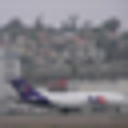

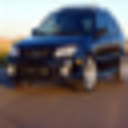

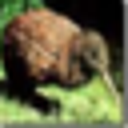

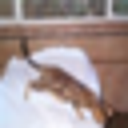

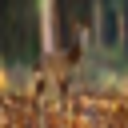

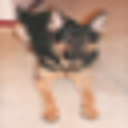

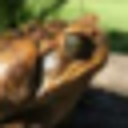

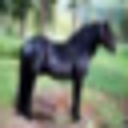

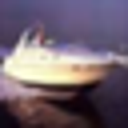

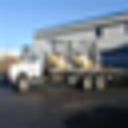

In [ ]:
# displaying images of all different classes
from PIL import Image
from IPython.display import display
ind = []
for i in range(10):
  ind.append(list(y_train).index(i))
print(ind)
for index in ind:
  tem_img = x_train[index,:]
  r = tem_img[:1024].reshape(32,32)
  g = tem_img[1024:2048].reshape(32,32)
  b = tem_img[2048:].reshape(32,32)
  rgb = np.dstack([r, g, b])
  img = Image.fromarray(np.array(rgb),'RGB')
  img = img.resize(size)
  display(img)
  print("")

In [ ]:
# standard scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
#max value of ecah of r,g,b is 255
#normalise the data
#max_rgb = 255
#x_train = x_train/max_rgb
#x_test = x_test/max_rgb

In [ ]:
df = pd.DataFrame(x_train)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.644198,0.660106,0.648403,0.642271,0.650404,0.642623,0.637020,0.644036,0.637580,0.631833,0.627374,0.624360,0.622165,0.623488,0.623709,0.623209,0.623974,0.609990,0.610524,0.612243,0.600144,0.602512,0.590240,0.594528,0.601195,0.593561,0.585696,0.580540,0.560213,0.538596,0.517525,0.476122,0.686302,0.690416,0.694298,0.692485,0.688409,0.694489,0.688793,0.682974,...,-0.206730,-0.160593,-0.114092,-0.228446,-0.296150,-0.300650,-0.336773,-0.346735,-0.354165,-0.369218,-0.309591,-0.399532,-0.398548,-0.397397,-0.380152,-0.331832,-0.347457,-0.410332,-0.347114,-0.392493,-0.421649,-0.499859,-0.406588,-0.343772,-0.389176,-0.391483,-0.392422,-0.411019,-0.415703,-0.465655,-0.449873,-0.479519,-0.433511,-0.434063,-0.463972,-0.495981,-0.525727,-0.523775,-0.521939,-0.568440
1,-1.386526,-1.494063,-1.468727,-1.497038,-1.457115,-1.260220,-0.554895,0.069052,-0.023398,-0.029655,0.105545,0.003469,-0.098802,-0.368413,-0.880329,-1.023241,-0.340532,0.624159,0.936237,0.895119,0.712982,0.969015,1.012523,1.044859,1.008707,0.986547,0.949894,0.957565,0.921323,0.912619,0.931268,0.941719,-1.363680,-1.425149,-1.583535,-1.586165,-1.477273,-1.179583,-0.550691,-0.258155,...,-1.402003,-1.354713,-1.336117,-1.276668,-1.216417,-1.233785,-1.187497,-1.202161,-1.391546,-1.166043,-1.095522,-1.096085,-0.879964,-1.082210,-1.580791,-1.408558,-1.035644,-0.989627,-1.366046,-1.506855,-1.457872,-1.536067,-1.710553,-1.725920,-1.692334,-1.695634,-1.585773,-1.524026,-1.495444,-1.529129,-1.541586,-1.506773,-1.506073,-1.444647,-1.394597,-1.364530,-1.314584,-1.310916,-1.274450,-1.280805
2,-1.291123,-1.342167,-1.524077,-1.552604,-1.122145,-1.106314,-1.606585,-1.571756,-1.626622,-1.620040,-1.586873,-1.576979,-1.526598,-1.530353,-1.561404,-1.505821,-1.517798,-1.529476,-1.513690,-1.537612,-1.501465,-1.427353,-1.464873,-1.460108,-1.492570,-1.567862,-1.571481,-1.555935,-1.509223,-1.456192,-1.440855,-1.386266,-1.033481,-1.146785,-1.611484,-1.347047,-0.585521,-0.483905,-1.661952,-1.712625,...,1.130089,1.096376,1.060931,1.023163,0.982864,0.959081,0.900644,0.875303,0.758389,0.810695,0.830779,0.823307,0.843817,0.878845,0.914043,0.963360,0.997635,1.030078,1.048040,1.082860,1.148386,1.164355,1.164456,1.164026,1.180893,1.211209,1.193478,1.172273,1.133492,1.113916,1.109717,1.076926,1.043205,1.042945,1.025030,0.977450,0.943712,0.911599,0.860224,0.841134
3,-1.372897,-1.176461,-1.205815,-1.135856,-0.856961,-0.966399,-1.466360,-0.954700,-0.670313,-0.677068,-1.135562,-1.816869,-1.823467,-1.856263,-1.901941,-1.903240,-1.914948,-1.883692,-1.853564,-1.848775,-1.854084,-1.850242,-1.830852,-1.840074,-1.857925,-1.876636,-1.865641,-1.849177,-1.814777,-1.816363,-1.220192,0.448734,-1.322405,-0.743157,-1.010583,-0.742220,-0.458128,-0.867238,-1.476742,-0.942611,...,-0.678548,-0.710517,-0.396098,-0.431832,-0.140173,0.025947,-0.259434,-0.087052,0.472734,-0.093394,-0.093845,-0.198305,-0.181134,-0.148374,-0.224225,-0.206994,-0.159770,-0.128513,-0.111975,-0.141369,-0.170443,-0.154456,-0.155221,-0.061060,-0.028060,-0.014379,-0.062681,-0.160200,-0.149679,-0.168508,-0.169147,-0.246052,-0.215890,-0.107566,-0.076211,-0.154766,-0.108097,-0.122488,-0.230149,0.492529
4,-1.304752,-0.693154,-0.583130,-1.108073,-1.191931,-1.316186,-1.171887,-0.772388,-0.009335,-0.001507,-0.402181,-0.687977,-0.749085,-0.580963,0.581142,1.190950,1.063676,0.411629,-0.225000,0.371799,0.346258,0.109142,0.407250,0.847839,0.868185,0.804089,0.739780,0.650359,0.504658,0.344658,0.089992,0.311793,-1.377438,-0.924094,-0.619299,-0.756286,-1.066784,-1.435138,-1.191803,-0.928352,...,0.029179,-0.034896,0.042578,0.053166,0.031402,0.134812,-0.151160,-0.591142,0.322388,0.427607,0.615033,0.653038,0.766169,0.801026,1.007599,1.041384,0.809948,0.497752,0.201542,

In [ ]:
#mixing the train and test data for applying lda

In [ ]:
xtes = pd.DataFrame(x_test)

In [ ]:
df = pd.concat([df,xtes])

In [ ]:
df.shape

(60000, 3072)

In [ ]:
dfy = pd.DataFrame(y_train)
dfy1 = pd.DataFrame(y_test)
dfy = pd.concat([dfy,dfy1])

In [ ]:
dfy.shape

(60000, 1)

In [ ]:
df.insert(loc=0, column='target', value=dfy.values)

In [ ]:
df.head()

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0,0.644198,0.660106,0.648403,0.642271,0.650404,0.642623,0.637020,0.644036,0.637580,0.631833,0.627374,0.624360,0.622165,0.623488,0.623709,0.623209,0.623974,0.609990,0.610524,0.612243,0.600144,0.602512,0.590240,0.594528,0.601195,0.593561,0.585696,0.580540,0.560213,0.538596,0.517525,0.476122,0.686302,0.690416,0.694298,0.692485,0.688409,0.694489,0.688793,...,-0.206730,-0.160593,-0.114092,-0.228446,-0.296150,-0.300650,-0.336773,-0.346735,-0.354165,-0.369218,-0.309591,-0.399532,-0.398548,-0.397397,-0.380152,-0.331832,-0.347457,-0.410332,-0.347114,-0.392493,-0.421649,-0.499859,-0.406588,-0.343772,-0.389176,-0.391483,-0.392422,-0.411019,-0.415703,-0.465655,-0.449873,-0.479519,-0.433511,-0.434063,-0.463972,-0.495981,-0.525727,-0.523775,-0.521939,-0.568440
1,6,-1.386526,-1.494063,-1.468727,-1.497038,-1.457115,-1.260220,-0.554895,0.069052,-0.023398,-0.029655,0.105545,0.003469,-0.098802,-0.368413,-0.880329,-1.023241,-0.340532,0.624159,0.936237,0.895119,0.712982,0.969015,1.012523,1.044859,1.008707,0.986547,0.949894,0.957565,0.921323,0.912619,0.931268,0.941719,-1.363680,-1.425149,-1.583535,-1.586165,-1.477273,-1.179583,-0.550691,...,-1.402003,-1.354713,-1.336117,-1.276668,-1.216417,-1.233785,-1.187497,-1.202161,-1.391546,-1.166043,-1.095522,-1.096085,-0.879964,-1.082210,-1.580791,-1.408558,-1.035644,-0.989627,-1.366046,-1.506855,-1.457872,-1.536067,-1.710553,-1.725920,-1.692334,-1.695634,-1.585773,-1.524026,-1.495444,-1.529129,-1.541586,-1.506773,-1.506073,-1.444647,-1.394597,-1.364530,-1.314584,-1.310916,-1.274450,-1.280805
2,0,-1.291123,-1.342167,-1.524077,-1.552604,-1.122145,-1.106314,-1.606585,-1.571756,-1.626622,-1.620040,-1.586873,-1.576979,-1.526598,-1.530353,-1.561404,-1.505821,-1.517798,-1.529476,-1.513690,-1.537612,-1.501465,-1.427353,-1.464873,-1.460108,-1.492570,-1.567862,-1.571481,-1.555935,-1.509223,-1.456192,-1.440855,-1.386266,-1.033481,-1.146785,-1.611484,-1.347047,-0.585521,-0.483905,-1.661952,...,1.130089,1.096376,1.060931,1.023163,0.982864,0.959081,0.900644,0.875303,0.758389,0.810695,0.830779,0.823307,0.843817,0.878845,0.914043,0.963360,0.997635,1.030078,1.048040,1.082860,1.148386,1.164355,1.164456,1.164026,1.180893,1.211209,1.193478,1.172273,1.133492,1.113916,1.109717,1.076926,1.043205,1.042945,1.025030,0.977450,0.943712,0.911599,0.860224,0.841134
3,2,-1.372897,-1.176461,-1.205815,-1.135856,-0.856961,-0.966399,-1.466360,-0.954700,-0.670313,-0.677068,-1.135562,-1.816869,-1.823467,-1.856263,-1.901941,-1.903240,-1.914948,-1.883692,-1.853564,-1.848775,-1.854084,-1.850242,-1.830852,-1.840074,-1.857925,-1.876636,-1.865641,-1.849177,-1.814777,-1.816363,-1.220192,0.448734,-1.322405,-0.743157,-1.010583,-0.742220,-0.458128,-0.867238,-1.476742,...,-0.678548,-0.710517,-0.396098,-0.431832,-0.140173,0.025947,-0.259434,-0.087052,0.472734,-0.093394,-0.093845,-0.198305,-0.181134,-0.148374,-0.224225,-0.206994,-0.159770,-0.128513,-0.111975,-0.141369,-0.170443,-0.154456,-0.155221,-0.061060,-0.028060,-0.014379,-0.062681,-0.160200,-0.149679,-0.168508,-0.169147,-0.246052,-0.215890,-0.107566,-0.076211,-0.154766,-0.108097,-0.122488,-0.230149,0.492529
4,7,-1.304752,-0.693154,-0.583130,-1.108073,-1.191931,-1.316186,-1.171887,-0.772388,-0.009335,-0.001507,-0.402181,-0.687977,-0.749085,-0.580963,0.581142,1.190950,1.063676,0.411629,-0.225000,0.371799,0.346258,0.109142,0.407250,0.847839,0.868185,0.804089,0.739780,0.650359,0.504658,0.344658,0.089992,0.311793,-1.377438,-0.924094,-0.619299,-0.756286,-1.066784,-1.435138,-1.191803,...,0.029179,-0.034896,0.042578,0.053166,0.031402,0.134812,-0.151160,-0.591142,0.322388,0.427607,0.615033,0.653038,0.766169,0.801026,1.007599,1.041384,0.809948,0.497752,0.201542,0.094059,0.159264,0.159547,0.253251

In [ ]:
df.shape

(60000, 3073)

In [ ]:
#separating the input features and target variable
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
#performing lda and plotting data variance vs no of components

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ld = LinearDiscriminantAnalysis().fit(x,y)

Text(0, 0.5, 'cumulative explained variance')

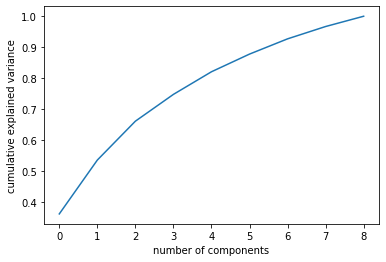

In [ ]:
plt.plot(np.cumsum(ld.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# for n_components=9 data variance is close to 100. so applying lda with n_components=9
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=9)
lda_ = lda.fit(x,y).transform(x)
lda.explained_variance_ratio_

array([0.36044378, 0.17425083, 0.12578797, 0.08673385, 0.07316719,
       0.05717146, 0.04931047, 0.03989756, 0.03323689])

In [ ]:
x = pd.DataFrame(lda_)

In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8
0,-1.115235,0.362455,-0.456531,0.153165,0.114836,-0.014503,0.879647,-0.472335,-0.346321
1,1.054302,-1.627405,-1.053468,-0.600019,0.800842,1.745274,0.354328,-0.154268,-0.170844
2,1.635734,2.127957,0.235932,0.548794,-1.068684,0.704406,1.084085,-0.046654,-0.434606
3,2.094740,0.203237,-0.010616,0.891863,0.560730,0.574701,2.855593,-2.586534,-0.990430
4,0.790877,-0.152657,2.838479,2.008143,-0.463904,-0.741853,0.175185,-2.470073,-1.623048


In [ ]:
x.shape

(60000, 9)

In [ ]:
arr = lda.explained_variance_ratio_
print(arr)
sum=0
for i in arr:
  sum+=i
print(sum)

[0.36044378 0.17425083 0.12578797 0.08673385 0.07316719 0.05717146
 0.04931047 0.03989756 0.03323689]
0.9999999999999999


In [ ]:
# separating test and train sets

In [ ]:
x_train = x.iloc[0:50001,:]
y_train = y.iloc[0:50001]

In [ ]:
x_test = x.iloc[50001:,:]
y_test = y.iloc[50001:]

In [ ]:
#model the random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)

In [ ]:
#perform gridsearchcv for bes parameters
from sklearn.model_selection import GridSearchCV
params = { 
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [6,8,10],
    'min_samples_leaf': [8,10,13],
}
gs = GridSearchCV(estimator=rf_model, param_grid=params, cv= 5)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [ ]:
#get the best parameters
gs.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 8}

In [ ]:
# model the randomforest with the best params obtained from grid search
rf_model = RandomForestClassifier(random_state=1,max_depth=10,max_features='sqrt',min_samples_leaf=8)
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
rf = rf_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(rf,y_test)

0.6228622862286228

In [ ]:
#from sklearn.svm import SVC
#svm = SVC()
#svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#sv = svm.predict(x_test)
#accuracy_score(sv,y_test)

0.6227622762276228

In [ ]:
#model the gaussianNB classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#perform gridsearch
from sklearn.model_selection import GridSearchCV
params_GNB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs = GridSearchCV(estimator=gnb, param_grid=params_GNB, cv=5,verbose=1,scoring='accuracy')
gs.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   15.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.5...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
gs.best_params_

{'var_smoothing': 0.02310129700083159}

In [ ]:
gs.best_score_

0.5039503189681032

In [ ]:
#train with best params
gnb = GaussianNB(var_smoothing= 0.02310129700083159)
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=0.02310129700083159)

In [ ]:
#predict the output and calculate the accuracy

In [ ]:
gnb_pred = gnb.predict(x_test)

In [ ]:
accuracy_score(y_test,gnb_pred)

0.5968596859685968

In [ ]:
#model the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#perform gridsearch
params_KNN = {'n_neighbors': [7,8,9], 'p': [1, 2, 5]}
gs_KNN = GridSearchCV(estimator=knn, param_grid=params_KNN,cv=5,verbose=1,scoring='accuracy')
gs_KNN.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  9.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [7, 8, 9], 'p': [1, 2, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
gs_KNN.best_params_

{'n_neighbors': 9, 'p': 2}

In [ ]:
gs_KNN.best_score_

0.4631310408959104

In [ ]:
#train the model with the best params
knn = KNeighborsClassifier(n_neighbors=9,p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
#predict the output and calculate the accuracy
kn = knn.predict(x_test)
accuracy_score(kn,y_test)

0.634963496349635

In [ ]:
#model evaluation using cross validation
from sklearn.model_selection import cross_val_score
cvl_rf = cross_val_score(rf_model, x_train, y_train, cv=5)
cvl_gnb = cross_val_score(gnb, x_train, y_train, cv=5)
cvl_knn = cross_val_score(knn, x_train, y_train, cv=5)

In [ ]:
print(cvl_rf)
print("Randomforest model : ",np.mean(cvl_rf))
print(cvl_gnb)
print("GNB model : ",np.mean(cvl_gnb))
print(cvl_knn)
print("KNN model : ",np.mean(cvl_knn))

[0.47845215 0.574      0.4871     0.4769     0.4751    ]
Randomforest model :  0.49831043095690425
[0.48405159 0.5909     0.4906     0.4791     0.4751    ]
GNB model :  0.5039503189681032
[0.4479552 0.5315    0.4512    0.4439    0.4411   ]
KNN model :  0.4631310408959104


WITHOUT DIMENSIONALITY REDUCTION

In [ ]:
#unpickling the data for performing without lda
xw_train = np.concatenate((xt1,xt2,xt3,xt4,xt5))
yw_train = np.concatenate((yt1,yt2,yt3,yt4,yt5))
yw_train.reshape(50000)
xw_test = unpickle(path + 'test_batch')[b'data']
yw_test = unpickle(path + 'test_batch')[b'labels']
yw_test = np.array(yw_test)
yw_test.reshape(10000)

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
#randomforest model
rf_model_w = RandomForestClassifier(random_state=1,max_depth=10,max_features='sqrt',min_samples_leaf=8)
rf_model_w.fit(xw_train,yw_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#predict the output and calculate the accuracy
rf_w = rf_model_w.predict(xw_test)
accuracy_score(rf_w,yw_test)

0.6138

In [ ]:
#from sklearn.svm import SVC
#svm_w = SVC()
#svm_w.fit(xw_train,yw_train)

In [ ]:
#sv_w = svm_w.predict(xw_test)
#accuracy_score(sv_w,yw_test)

In [ ]:
#gaussianNB model
gnb_w = GaussianNB()
gnb_w.fit(xw_train,yw_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#predict the output and calculate the accuracy

In [ ]:
gnb_pred_w = gnb_w.predict(xw_test)

In [ ]:
accuracy_score(gnb_pred_w,yw_test)

0.2964

In [ ]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_w = KNeighborsClassifier()
knn_w.fit(xw_train,yw_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#predict the output and calculate the accuracy

In [ ]:
kn_w = knn_w.predict(xw_test)
accuracy_score(kn_w,yw_test)

0.5072

In [ ]:
#model evaluation using cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
cvl_rf_w = cross_val_score(rf_model_w, xw_train, yw_train, cv=5)
cvl_gnb_w = cross_val_score(gnb_w, xw_train, yw_train, cv=5)
cvl_knn_w = cross_val_score(knn_w, xw_train, yw_train, cv=5)

In [ ]:
print(cvl_rf_w)
print("Randomforest model : ",np.mean(cvl_rf_w))
print(cvl_gnb_w)
print("GNB model : ",np.mean(cvl_gnb_w))
print(cvl_knn_w)
print("KNN model : ",np.mean(cvl_knn_w))

[0.4164 0.4249 0.4154 0.4213 0.4165]
Randomforest model :  0.4189
[0.2782 0.296  0.2882 0.2906 0.2865]
GNB model :  0.2879
[0.3294 0.3337 0.3389 0.3386 0.3259]
KNN model :  0.33330000000000004


TESTING

Random forest model Predited :  4
KNN model Predited :  2
Actual :  3


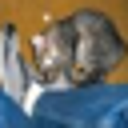


Random forest model Predited :  8
KNN model Predited :  8
Actual :  8


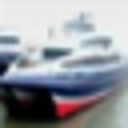


Random forest model Predited :  8
KNN model Predited :  8
Actual :  8


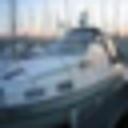


Random forest model Predited :  8
KNN model Predited :  0
Actual :  0


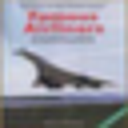


Random forest model Predited :  4
KNN model Predited :  6
Actual :  6


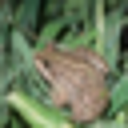


Random forest model Predited :  6
KNN model Predited :  6
Actual :  6


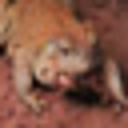


Random forest model Predited :  1
KNN model Predited :  6
Actual :  1


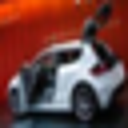


Random forest model Predited :  6
KNN model Predited :  2
Actual :  6


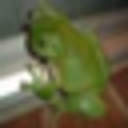


Random forest model Predited :  3
KNN model Predited :  3
Actual :  3


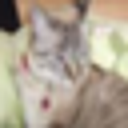


Random forest model Predited :  8
KNN model Predited :  8
Actual :  1


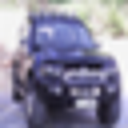

In [ ]:
testcase_x = xw_test[0:10,:]
testcase_y = yw_test[0:10]
predicted_rf = rf_model_w.predict(testcase_x)
predicted_knn = knn_w.predict(testcase_x)
from PIL import Image
from IPython.display import display
for i in range(10):
  tem_img = testcase_x[i,:]
  r = tem_img[:1024].reshape(32,32)
  g = tem_img[1024:2048].reshape(32,32)
  b = tem_img[2048:].reshape(32,32)
  rgb = np.dstack([r, g, b])
  img = Image.fromarray(np.array(rgb),'RGB')
  img = img.resize(size)
  print("Random forest model Predited : ",predicted_rf[i])
  print("KNN model Predited : ",predicted_knn[i])
  print("Actual : ",testcase_y[i])
  display(img)
  print("")